#### Loading Libraries

In [1]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import networkx as nx
from nxviz import MatrixPlot, CircosPlot, ArcPlot
import pandas as pd

#### Load Dataset

The Nest class in the *termite* module provides tools for preprocessing a tracking result dataset, we'll assume that the data was generated using this process from now on.

Let's proceed to load the data then...

In [2]:
def load_dataset(datapath):
    dataset = []
    for table in sorted(glob.glob(datapath)):
        dataset.append(pd.read_csv(table))
    return dataset

dataset = load_dataset('../data/Clustering/expanded/*.csv')

This gives us a list of Pandas dataframes containing each termite data, from now on we can further investigate the underlying structure of termite self organization.

#### Instant Encounters Graphs

To get a better intuition over how to represent the termites' network, let's first build a graph showing the encounters of a termite in a given frame. We'll do this in very generalized way so we can come back and use this code in the future if it's necessary.

In [3]:
def build_focal_frame_encounter_graph(focal_termite, frame):
    frame_data = dataset[focal_termite].loc[frame]
    G = nx.Graph()
    G.add_node(focal_termite+1)
    for termite_number in range(1, len(dataset)+1):
        if termite_number-1 != focal_termite:
            if frame_data.loc['interaction_with_t{}'.format(termite_number)] != 'no-interaction':
                G.add_node(termite_number)
                G.add_edge(focal_termite+1, termite_number)
    return G    

Now we can retrieve the encounters of a focal termite specifying his position in the *dataset* list and which frame should be investigated, for example, let's check the encounter of the termite with label *t1* (position zero in the dataset list) in the 50000th frame:

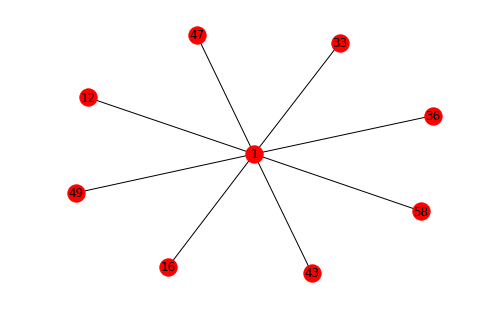

In [4]:
focal_encounters = build_focal_frame_encounter_graph(0, 50000)
nx.draw(focal_encounters, with_labels=True)

We can do this for every termite in the dataset in a given frame and get the configuration of the network in a given frame. Again it's pertinent to write a function so we can reuse it later...

In [5]:
def build_frame_encounter_graph(frame):
    frame_data = []
    G = nx.Graph()
    for termite_number in range(1, len(dataset)+1):
        G.add_node(termite_number)
        frame_data = dataset[termite_number-1].loc[frame]
        for other in range(1, len(dataset)+1):
            if termite_number != other:
                if frame_data.loc['interaction_with_t{}'.format(other)] != 'no-interaction':
                    G.add_node(other)
                    G.add_edge(termite_number, other)
    return G

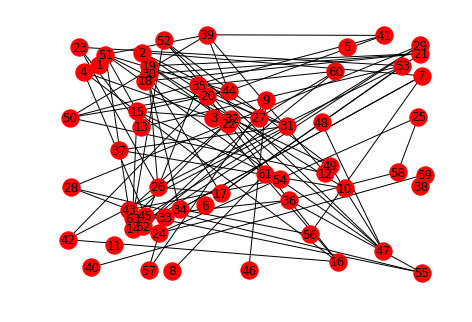

In [6]:
frame_encounters = build_frame_encounter_graph(500)
nx.draw_random(frame_encounters, with_labels=True)

Finally, let's check the encounters during the whole experiment, is the graph fully connected?

In [7]:
def build_encounter_graph():
    G = nx.Graph()
    for t_number in range(len(dataset)):
        G.add_node(t_number)
        for frame in range(1, len(dataset[0].loc[:,'frame'])):
            for other in range(t_number+1, len(dataset)):
                if dataset[t_number].loc[frame, 'interaction_with_t{}'.format(other+1)] != 'no-interaction':
                    G.add_node(other)
                    G.add_edge(t_number, other)
    return G

In [8]:
all_encounters = build_encounter_graph()

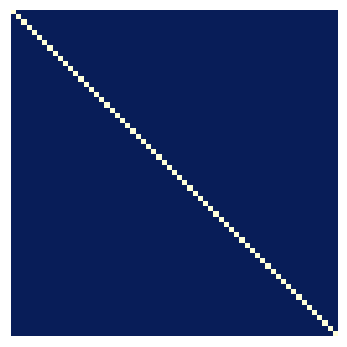

In [9]:
plot = MatrixPlot(all_encounters)
plot.draw()

And yes, it's fully connected! :)